<img src="image/penguin-161418_1280.png" width="100" align="center">

<h1><center>How to become a Data Science Freelancer?</center></h1>

<h4>About this Notebook</h4>
In this notebook, I'll summarize the most important results from the `Data Analysis.ipynb` notebook. I focus on the questions for my blog post. Every question 

<h1>Table of contents</h1>
<div  style="margin-top: 20px"> 
    <ol>
        <li><a href="#skills">What skills do Data Science Freelancer have?</a></li>
    </ol>   
</div>
<br>
<hr>

### Importing Needed packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import imp # for reloading modules

import helper as h

# surpress Jupyter Notebook warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
imp.reload(h)

<module 'helper' from '/Users/dirkkalmbach/Library/Mobile Documents/com~apple~CloudDocs/Projekte/DSND/blog-project/helper.py'>

## Load Data

In [9]:
# Load survey 2019 dataset 
df = h.load_csv('data/raw data/developer_survey_2019/survey_results_public.csv.zip')
print("Dataframe sucessfully loaded.")

# Load data description
schema = h.load_csv("data/raw data/developer_survey_2019/survey_results_schema.csv")

h.df_info(df)

Dataframe sucessfully loaded.
Rows: 88883 	 Variables: 85 	 	 Size: n/a kb


<h1 id="skills">What skills do Data Science Freelancer have?</h1>

## Definition of Target Group(s)

In [3]:
h.get_desc("Employment")

'Which of the following best describes your current employment status?'

In [4]:
# Im only interested in full working people -> no parttime, students, etc.
df = df[(df["Employment"]=='Employed full-time') | (df["Employment"]=='Independent contractor, freelancer, or self-employed')]
h.df_info(df)

Rows: 72951 	 Variables: 85 	 	 Size: n/a kb


In [5]:
# TODO: überarbeiten

# Freelancing is asked 2x -> I wonder if there are some mismatches
df[ (df["Employment"]=='Independent contractor, freelancer, or self-employed') & (
     df["OrgSize"]== "Just me - I am a freelancer, sole proprietor, etc.")
  ].shape

df[df["Employment"]=='Independent contractor, freelancer, or self-employed'].shape
df[df["OrgSize"]== "Just me - I am a freelancer, sole proprietor, etc."].shape

(3817, 85)

#### How many "Pure" Data Scientists are in the dataset?

In [8]:
PDS = df[df["DevType"]=="Data scientist or machine learning specialist"]
h.df_info(PDS)

Rows: 494 	 Variables: 85 	 	 Size: n/a kb


_...and how many among them are Freelancer?_

In [9]:
# How many Freelance Pure Data Scientists?
h.df_info(
    PDS[PDS["Employment"]=="Independent contractor, freelancer, or self-employed"]
)

Rows: 25 	 Variables: 85 	 	 Size: n/a kb


Wow! 😱 Only 25 Cases! Of course, this is not enough for any valuable insights 😫

#### Group Data related Jobs

In [10]:
#TODO: Refactor with this
    #df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'

DJ=["Data scientist or machine learning specialist", "Data or business analyst", "Engineer, data"]
RS=["Academic Research","Scientist"]
DS=["Data scientist or machine learning specialist"]

def t(col, jobs, cat):
    found=False
    for job in jobs:
        if job in col:
            found=True
    if found:
        return cat
    else:
        return np.nan
            
            
# Science Jobs
df["Job_RS"]=df["DevType"].apply(lambda x: t(str(x),RS,"Something with Science"))

# Data Jobs
df["Job_DJ"]=df["DevType"].apply(lambda x: t(str(x),DJ,"Something with Data"))

# Data Scientists
df["Job_DS"]=df["DevType"].apply(lambda x: t(str(x),DS,"Data Scientist"))

# Other Jobs
df["Job_DS"]=df["DevType"].apply(lambda x: t(str(x),DS,"Data Scientist"))

# Print Results
print("Data Scientist (n): {} (NaN: {})".format( df.Job_DS.count(), df.Job_DS.isna().sum()) )
print("Something with Data: {} (NaN: {})".format( df.Job_DJ.count(),  df.Job_DJ.isna().sum()) )
print("Something with Science (n): {} (NaN: {})".format( df.Job_RS.count(), df.Job_RS.isna().sum()) ) 

Data Scientist (n): 5436 (NaN: 67515)
Something with Data: 12160 (NaN: 60791)
Something with Science (n): 2984 (NaN: 69967)


> 🤓 The 3 new build variables are not exclusive, i.e.: somebody who marked herself as Data Scientist, Business Analyst, and Scientist would be in all three groups!

Let's put this all in one variable TargetGroups with these categories:
- PDS
- DS
- DJ

In [128]:
# create new var 'TargetGroup'
df.loc[df['Job_DJ'] == "Something with Data", 'TargetGroup'] = 'Something with Data'
df.loc[df['Job_RS'] == "Something with Science", 'TargetGroup'] = 'Something with Science'
df.loc[df['Job_DS'] == "Data Scientist", 'TargetGroup'] = 'Data Scientist'
df["TargetGroup"].fillna(value="other Job", inplace=True)

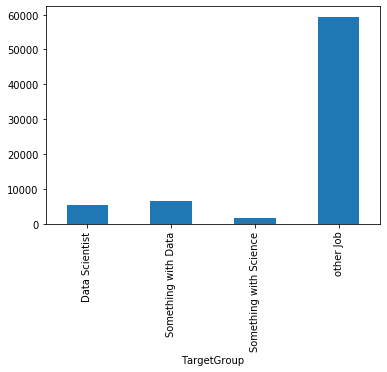

In [129]:
df.groupby("TargetGroup").count().Respondent.plot.bar()

## Job Satisfaction

How happy are Data Scientists with their job?

In [37]:
# Question in Survey 2019
h.get_desc("JobSat")

'How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)'

In [130]:
# build jobsatisfaction index (1-5)

index = {'Slightly satisfied': 4, 
         'Slightly dissatisfied': 2,
         'Neither satisfied nor dissatisfied': 3,
         'Very satisfied': 5,
         'Very dissatisfied': 1,
         np.nan: np.nan
        }

df["JobSatIndex"] = df["JobSat"].apply(lambda x: index[x])

print("Avg Job Satisfaction: ", df.JobSatIndex.mean().round(2))  

Avg Job Satisfaction:  3.69


#### Job Satisfaction between Freelancer and Employed

In [131]:
df.groupby('Employment') \
       .agg(n=('Employment', 'size'), Job_Satisfaction=('JobSatIndex', 'mean')).reset_index()

,Employment,n,Job_Satisfaction
0,Employed full-time,64440,3.684898
1,"Independent contractor, freelancer, or self-em...",8511,3.713764


> ❗__Interesting__: no difference between Freelancer and employed

#### Job Satisfaction between Data Jobs

In [135]:
df.groupby('TargetGroup') \
       .agg(n=('TargetGroup', 'size'), Job_Satisfaction=('JobSatIndex', 'mean')).reset_index()

,TargetGroup,n,Job_Satisfaction
0,Data Scientist,5436,3.773581
1,Something with Data,6383,3.668349
2,Something with Science,1695,3.828402
3,other Job,59437,3.678203


> ❗only slight differences, but the direction looks interesting: Scientists are happier

## Salary

There are 3 questions to income:

In [49]:
h.get_desc("CompTotal")

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [50]:
h.get_desc("CompFreq")

'Is that compensation weekly, monthly, or yearly?'

In [51]:
h.get_desc("ConvertedComp")

'Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.'

In [136]:
USA = df[df["Country"]=="United States"]
world = df.copy()
# Build var Salary

# 2. delete all cases with no income
USA.dropna(subset=['ConvertedComp'], inplace=True)
world.dropna(subset=['ConvertedComp'], inplace=True)

# For USA
print("Avg Salary per year (USA) \n=============================================== \n",
USA.groupby('TargetGroup') \
       .agg(n=('TargetGroup', 'size'), Salary=('ConvertedComp', 'mean')).reset_index()
)
print("\n")
# For World
print("Avg Salary per year (WORLD) \n=============================================== \n",
world.groupby('TargetGroup') \
       .agg(n=('TargetGroup', 'size'), Salary=('ConvertedComp', 'mean')).reset_index()
     )

Avg Salary per year (USA) 
               TargetGroup      n         Salary
0          Data Scientist   1209  288442.998346
1     Something with Data   1483  247998.497640
2  Something with Science    298  267139.080537
3               other Job  11716  248569.954421


Avg Salary per year (WORLD) 
               TargetGroup      n         Salary
0          Data Scientist   3975  148556.245786
1     Something with Data   4641  136755.487826
2  Something with Science   1143  130849.357830
3               other Job  43873  128123.868758


> ❗Data Scientists make more cash than Scientists or Data Worker

## Working Hours

In [137]:
h.get_desc("WorkWeekHrs")

'On average, how many hours per week do you work?'

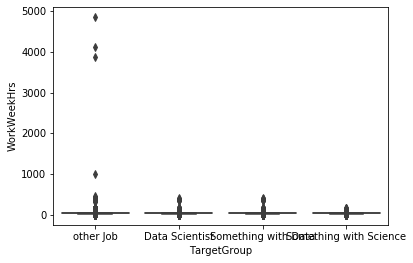

In [138]:
sns.boxplot(y="WorkWeekHrs", x="TargetGroup", data=df)

>❗Outliers! Lets say, everything more than 80h/week is unrealistic

In [157]:
# set maximum working hour per week
OUTLIER_SIZE=100

In [162]:
#TODO -> NaN in Working Hours <- Sandbox
print("Avg Working Hours per week (Freelancer)\n=========================================== \n",
df[(df.WorkWeekHrs<=OUTLIER_SIZE) & 
   (df.Employment=="Independent contractor, freelancer, or self-employed")].
      groupby('TargetGroup')
      .agg(n=('TargetGroup', 'size'), hours=('WorkWeekHrs', 'mean')).reset_index()
)

Avg Working Hours per week (Freelancer)
               TargetGroup     n      hours
0          Data Scientist   472  40.937500
1     Something with Data   583  41.262864
2  Something with Science   172  38.793605
3               other Job  4371  39.099801


In [163]:
print("Avg Working Hours per week (Employed full-time)\n=========================================== \n",
df[(df.WorkWeekHrs<=OUTLIER_SIZE) & 
   (df.Employment=="Employed full-time")].
      groupby('TargetGroup')
      .agg(n=('TargetGroup', 'size'), hours=('WorkWeekHrs', 'mean')).reset_index()
)

Avg Working Hours per week (Employed full-time)
               TargetGroup      n      hours
0          Data Scientist   4094  42.034392
1     Something with Data   4810  41.854595
2  Something with Science   1163  42.276182
3               other Job  45758  40.678834


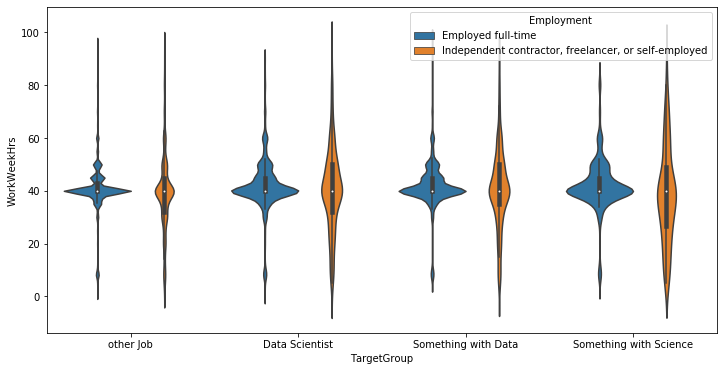

In [165]:
plt.figure(figsize=(12,6))
sns.violinplot(y="WorkWeekHrs", x="TargetGroup", hue="Employment", data=df[df.WorkWeekHrs<OUTLIER_SIZE])

🤓 The Median is all the same, because the data range is between 0 and 100 hours.

## Working Style

### Work Structure

In [6]:
h.get_desc("WorkPlan")

'How structured or planned is your work?'

In [111]:
# TODO: 3 pie diagrams in one row: proportion of scheduled work for every target group

array(["There's no schedule or spec; I work on what seems most important or urgent",
       'There is a schedule and/or spec (made by me or by a colleague), and I follow it very closely',
       'There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns',
       nan], dtype=object)

In [5]:
df.groupby("WorkPlan").count()

NameError: name 'df' is not defined